In [1]:
import pandas_datareader as web
import datetime
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math
import seaborn as sns


In [2]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 12, 31)
amzn = web.DataReader('AMZN', 'yahoo', start, end) 
amzn.head()
amzn.count()

High         1510
Low          1510
Open         1510
Close        1510
Volume       1510
Adj Close    1510
dtype: int64

In [3]:
#amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
amzn['lrets'] = (np.log(amzn.Close) - np.log(amzn.Close.shift(1))) * 100.
amzn.head()

,High,Low,Open,Close,Volume,Adj Close,lrets
Date,,,,,,,
2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,NaN
2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,-0.385192
2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,-0.711332
2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,1.111598
2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,0.972572


In [4]:
amzn['Stock_Price'] = (2*amzn.High + amzn.Low + amzn.Close)/4

In [14]:
amzn= amzn.round(4)
amzn.tail(100)

,High,Low,Open,Close,Volume,Adj Close,lrets,Stock_Price
Date,,,,,,,,
2019-12-02,1805.5500,1762.6801,1804.4000,1781.6000,3925600,1781.6000,-1.0719,1788.8450
2019-12-03,1772.8700,1747.2300,1760.0000,1769.9600,3380900,1769.9600,-0.6555,1765.7325
2019-12-04,1789.0900,1760.2200,1774.0100,1760.6899,2670100,1760.6899,-0.5251,1774.7725
2019-12-05,1763.5000,1740.0000,1763.5000,1740.4800,2823800,1740.4800,-1.1545,1751.8700
2019-12-06,1754.4000,1740.1300,1751.2000,1751.6000,3117400,1751.6000,0.6369,1750.1325
2019-12-09,1766.8900,1745.6100,1750.6600,1749.5100,2442800,1749.5100,-0.1194,1757.2250
2019-12-10,1750.6700,1735.0000,1747.4000,1739.2100,2514300,1739.2100,-0.5905,1743.8875
2019-12-11,1750.0000,1735.7100,1741.6700,1748.7200,2097600,1748.7200,0.5453,1746.1075
2019-12-12,1764.0000,1745.4399,1750.0000,1760.3300,3095900,1760.3300,0.6617,1758.4425


In [53]:
X=amzn.drop(['Close'],axis=1)
y=amzn['Close']
amzn= amzn.fillna(0)

In [54]:
X_train= X[:1410]
X_test = X[1410:]
y_train= y[:1410]
y_test=  y[1410:]

In [55]:
class RidgeRegression(object):
    def __init__(self, lmbda=0.1):
        self.lmbda = lmbda

    def fit(self, X, y):
        C = X.T.dot(X) + self.lmbda*np.eye(X.shape[1])
        self.w = np.linalg.inv(C).dot(X.T.dot(y))

    def predict(self, X):
        return X.dot(self.w)

    def get_params(self, deep=True):
        return {"lmbda": self.lmbda}

    def set_params(self, lmbda=0.1):
        self.lmbda = lmbda
        return self

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
ridge = RidgeRegression()
param_grid = [{"lmbda": 2.0**np.arange(-5, 10)}]
learner = GridSearchCV(ridge, param_grid, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=0)
learner.fit(X_train, y_train)

y_pred = learner.predict(X_test)
#ridge_error = accuracy_score(y_test, y_pred)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
ridge_error = mean_squared_error(y_test, y_pred)
sqrt(ridge_error)
print("Accuracy", r2_score(y_test, y_pred))
print("RMSE",sqrt(ridge_error))

Accuracy 0.9999999999960896
RMSE 6.894186276606842e-05


In [58]:
X_test['actual']= y_test
X_test['Predicted']= y_pred

In [101]:
returns = y_pred.pct_change()
sharpe_ratio = np.sqrt(100) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.25213446238886544


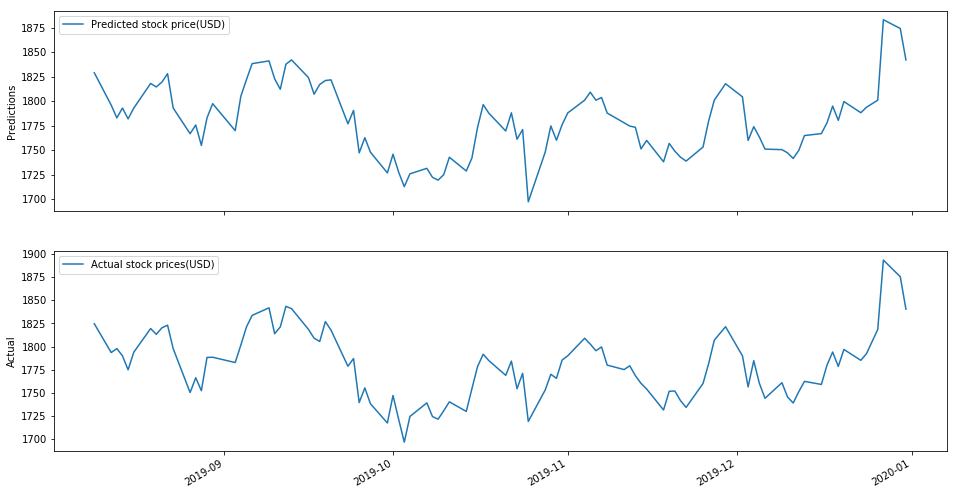

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))
fig.autofmt_xdate()
ax1.plot(X_test.actual,label="Predicted Close(USD)")
ax2.plot(X_test.Predicted,label="Actual Close(USD)")
ax1.set_ylabel("Predictions")
ax2.set_ylabel("Actual")
ax1.legend(loc='best')
ax2.legend(loc='best')

In [125]:
X_test['Close']= y_test
results= X_test

###  1 Buy & Hold Trading Strategy
 
* Position trading 
* Buy if we have next days predicted_value greater than todays close value and hold if already bought 
* Sell if we have next days predicted_value lesser than todays close value and dont buy until rule 1

In [126]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(results)-1):
    if results['Predicted'][i+1] > results['actual'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / results['actual'][i])
            balance = int(amount % results['actual'][i])
            portfolio = stocks * results['actual'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',results['actual'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * results['actual'][i]
            amount = portfolio + balance
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif results['Predicted'][i+1] < results['actual'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * results['actual'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    print('\n')
    

Stock: 1807.58 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 1784.92 Action: Buy Portfolio: 8924.6 Stocks: 5 Balance_init: 1075 total($) 9999.6


Stock: 1824.34 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10196.7


Stock: 1762.96 Action: Buy Portfolio: 8814.8 Stocks: 5 Balance_init: 1381 total($) 10195.8


Stock: 1776.12 Action: Bought--Holding Portfolio: 8880.6 Stocks: 5 Balance_init: 1381 total($) 10261.6


Stock: 1792.5699 Action: Bought--Holding Portfolio: 8962.85 Stocks: 5 Balance_init: 1381 total($) 10343.85


Stock: 1816.12 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10461.6


Stock: 1801.38 Action: Buy Portfolio: 9006.9 Stocks: 5 Balance_init: 1454 total($) 10460.9


Stock: 1823.54 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10571.7


Stock: 1804.66 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10571.7


Stock: 1749.62 Action: Buy P

In [127]:
results= results.reset_index()

In [128]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price':results.Close[1:],
                                 'Predicted_Close_Price':list(y_pred[1:]),
                                 'Date': results.Date[1:],
                                 'Action':  action,
                                 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Stocks,Portfolio($),Amount($)
1,1784.9200,1784.920014,2019-08-12,Price-Prediction-Already-Lower,0,0.0,10000.0
2,1824.3400,1824.340020,2019-08-13,Buy,5,8924.6,10000.0
3,1762.9600,1762.960037,2019-08-14,Sell,0,0.0,10197.0
4,1776.1200,1776.119987,2019-08-15,Buy,5,8814.8,10196.0
5,1792.5699,1792.569956,2019-08-16,Bought--Holding,5,8880.6,10262.0


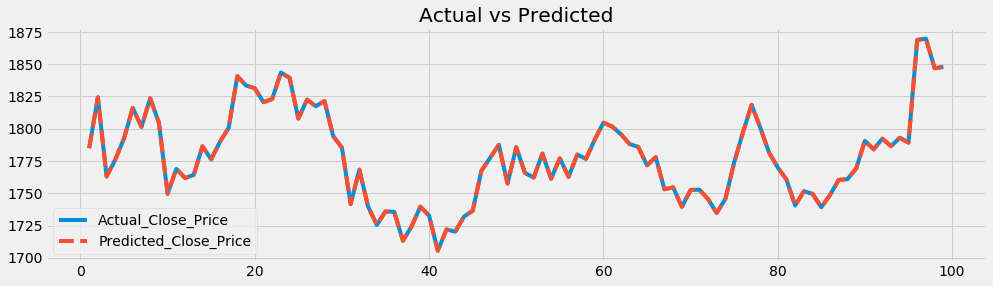

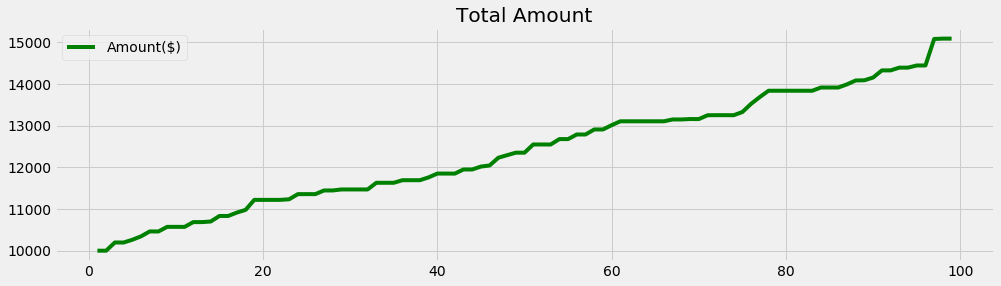

In [129]:
Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-g'], 
                                            title = 'Total Amount')

In [130]:
Profit = (Amount[-1])/10000
print('Initial_Investment : 10000$')
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent:',Profit*100,'%')

Initial_Investment : 10000$
Final Amount: 15087.0 $
Profit_Percent: 150.87 %


In [131]:
Strategy_Result['Returns'] = Strategy_Result['Amount($)'].pct_change()

In [132]:
mean_returns = Strategy_Result['Returns'].mean()
sd = Strategy_Result['Returns'].std()
Sharpe_Ratio = np.sqrt(100)*(mean_returns)/sd
Sharpe_Ratio

6.426442116310538

In [133]:
results.index= results['Date']

In [134]:
long_MA = results['actual'].rolling(window=20).mean()
results['Long_Moving_Avg'] = long_MA

In [135]:
short_MA  = results['actual'].rolling(window=5).mean()
results['Short_Moving_Avg'] = short_MA 

In [136]:
long_std= results['actual'].rolling(window=20).std()
results['Long_std'] = long_std

In [137]:
long_upper_band = ((long_MA) + (long_std)*0.75)
results['Long_Upper_Band'] = long_upper_band

In [138]:
long_lower_band = ((long_MA) - (long_std)*0.75)
results['Long_Lower_Band'] = long_lower_band

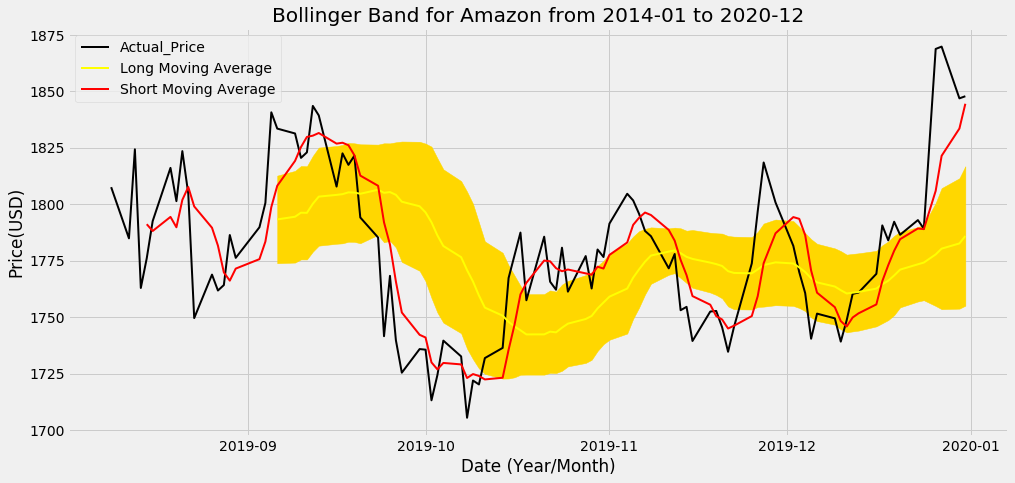

In [139]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
x_axis = results.index
ax.fill_between(x_axis, results['Long_Upper_Band'], results['Long_Lower_Band'], color='gold')
ax.plot(x_axis, results['actual'], color='black', lw=2, label = 'Actual_Price')
ax.plot(x_axis, results['Long_Moving_Avg'], color='yellow', lw=2, label = 'Long Moving Average')
ax.plot(x_axis, results['Short_Moving_Avg'], color='red', lw=2, label = 'Short Moving Average')

ax.set_title('Bollinger Band for Amazon from 2014-01 to 2020-12')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()